In [1]:
import  matplotlib.pyplot as plt  
import  numpy as np
import math
from gurobipy import *
import os
import errno
from time import time
import pandas as pd
import random

In [2]:
instancia = open('C:\\Users\\Asus\\Desktop\\Libro1.csv')

In [3]:
print(instancia)

<_io.TextIOWrapper name='C:\\Users\\Asus\\Desktop\\Libro1.csv' mode='r' encoding='cp1252'>


In [4]:
contador=0
numeroNodos=100
nodos={}
contadory=0
contadorLinea=0
matrix={}
cubierto={}
for  line in instancia:
    if(contadorLinea>0):
        linea= line.split(';')
        for i in range(numeroNodos):
            nodos[contador]= {'x': i, 'y':contadory, 'Cantidad': float(linea[i+1].split("\n")[0])}
            matrix[(i,contadory)]= float(linea[i+1].split("\n")[0])
            cubierto[(i,contadory)]= 0
            contador= contador+1
        contadory=contadory+1  
    contadorLinea= contadorLinea+1

In [5]:
print(matrix[(1,15)])

13.0


In [6]:

def localizacion(inicioi, inicioj, cubierto):
    Ingresos=0
    Visitados=0
    #numeroVehiculos=random.randint(74, 85)
    for vehiculo in range(1):
        ubicacionProbar=0
        verticex0=0
        verticey0=0
        ubicacionMejorl=[]
        maximo=-float('inf')
        wiii=99
        contador=0
        for i in range(inicioi,min(99,inicioi+100)):
            for j in range(inicioj,min(99,inicioj+100)):
                totalCubierto=0
                for k in range(max(i-5,0),min(i+6,99)):
                    for l in range(max(j-5,0),min(j+6,99)):
                        if(abs(i-k)+abs(j-l)<=5):
                            if(cubierto[(k,l)]==0 or  abs(j-l)==5 ):
                                a=1
                            else:
                                a=0
                            totalCubierto=totalCubierto+a
                if(totalCubierto>maximo):
                    maximo= totalCubierto
                    ubicacionMejorl.append((i,j))
        r= random.randint(1, 1)
        ubicacionMejor=ubicacionMejorl[-r]
        for i in range(max(ubicacionMejor[0]-5,0),min(ubicacionMejor[0]+6,99)):
            for j in range(max(ubicacionMejor[1]-5,0),min(ubicacionMejor[1]+6,99)):
                if(abs(ubicacionMejor[0]-i)+abs(ubicacionMejor[1]-j)<=5):
                    if(cubierto[(i,j)]==0):
                        Visitados=1+Visitados
                        Ingresos=matrix[(i,j)]+Ingresos
                    cubierto[(i,j)]=1
        cubierto[ubicacionMejor]=-1
        #print(Ingresos)
    return (cubierto.copy(), Visitados, Ingresos)

In [7]:
A=[(0,0)]
ingreso=0
mejorCubierto={}

IngresosT=0
VisitadosT=0
UtilidadT=0
for replica in A:
    #for i in range(100):
     #   for j in range(100):
            #cubierto[(i,j)]=0
    mayorUtilidad=-100000000000
    numeroPatrullas=0
    iteracion=[]
    Ingresos=0
    Visitados=0
    x=[]
    y=[]
    z=[]
    mayorUtilidad=-100000000000
    T=0
    for i in range(1,204):
        A1,A2=replica
        cubierto, Visitados1, Ingresos1= localizacion(A1,A2,cubierto)
        Visitados=Visitados1+Visitados
        Ingresos=Ingresos+Ingresos1
        Utilidad=Ingresos-i*0
        UtilidadT=Utilidad+UtilidadT
        VisitadosT=VisitadosT+Visitados
        T=T+i
        x.append(T)
        y.append(UtilidadT)
        z.append(VisitadosT)
        if(Utilidad>=mayorUtilidad):
            mayorUtilidad=Utilidad
            numeroPatrullas=i
            mejorCubierto=cubierto.copy()
    ingreso=ingreso+  mayorUtilidad      
    cubierto=mejorCubierto.copy()
    print(mayorUtilidad)

98046.0


In [8]:
file=open('C:\\Users\\Asus\\Desktop\\SolutionInfo.txt','w')
mt=[]
mCostos=[]
costos=0
for i in range(100):
    linea=""
    M=[]
    MC=[]
    for j in range(100):
        linea=linea+str(matrix[(i,j)])+" "
        M.append(mejorCubierto[(j,i)])
        MC.append(matrix[(j,i)]*mejorCubierto[(j,i)])
        costos=matrix[(i,j)]*mejorCubierto[(i,j)]+costos
    mt.append(M)
    mCostos.append(MC)
    file.write(linea)
    file.write("\n")
print(costos)
print(numeroPatrullas)

94646.0
203


In [9]:
print(ingreso)

98046.0


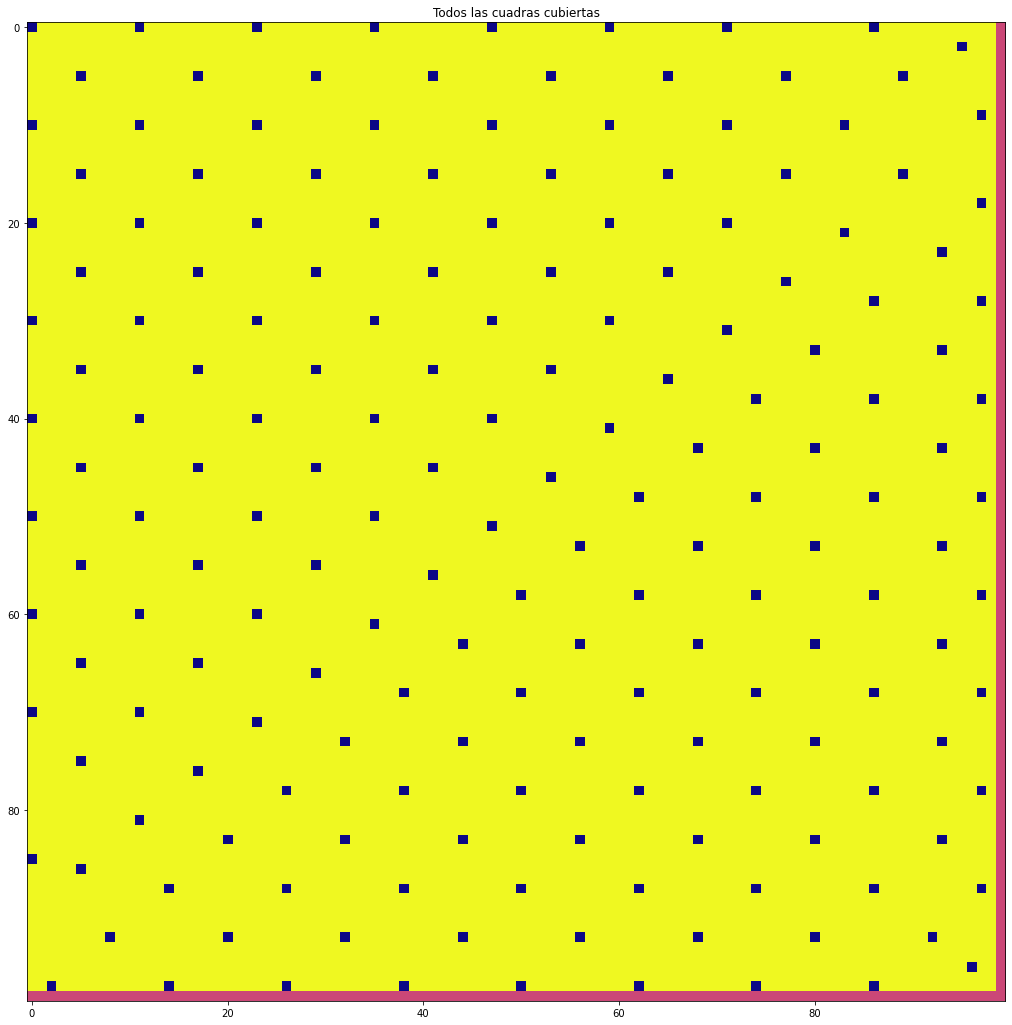

In [18]:
fig = plt.figure(figsize=(18,18))
plt.imshow(mt,cmap="plasma")
plt.title("Todos las cuadras cubiertas")
plt.show()

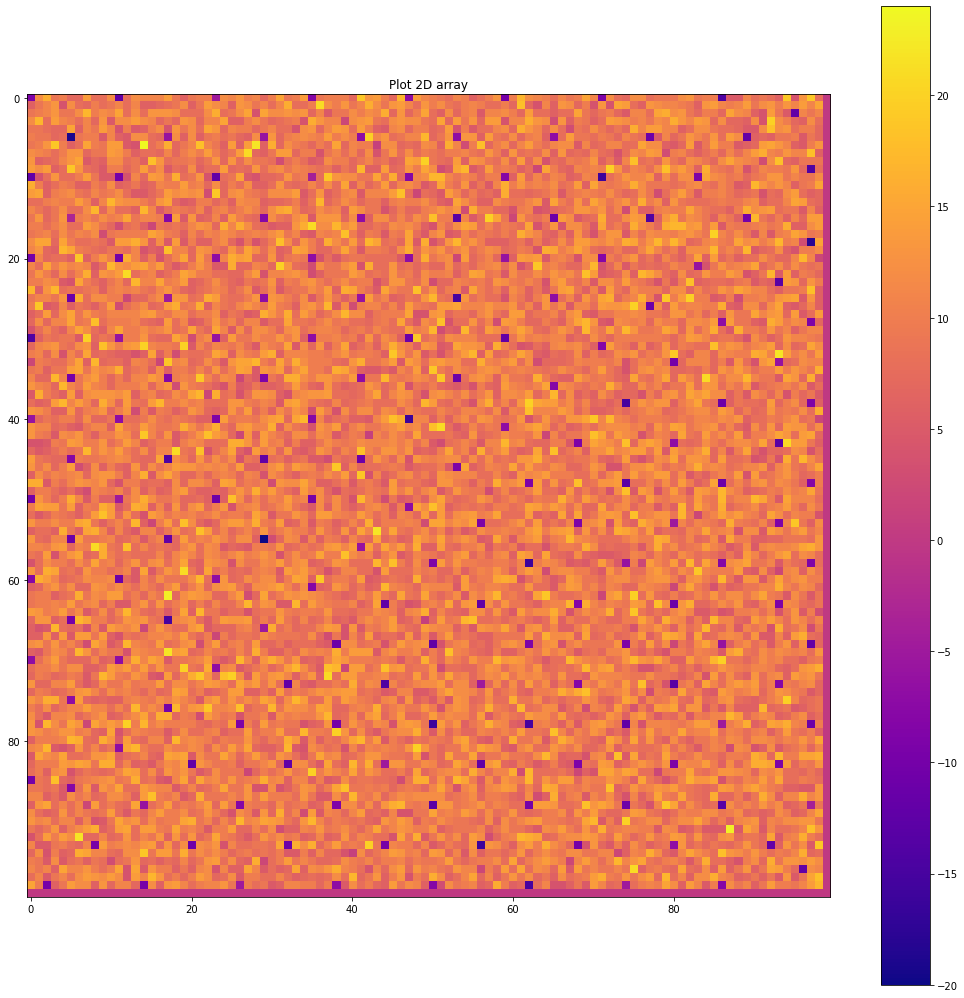

In [20]:
fig = plt.figure(figsize=(18,18))
plt.imshow(mCostos,cmap="plasma")
plt.title("Plot 2D array")
plt.colorbar()
plt.show()

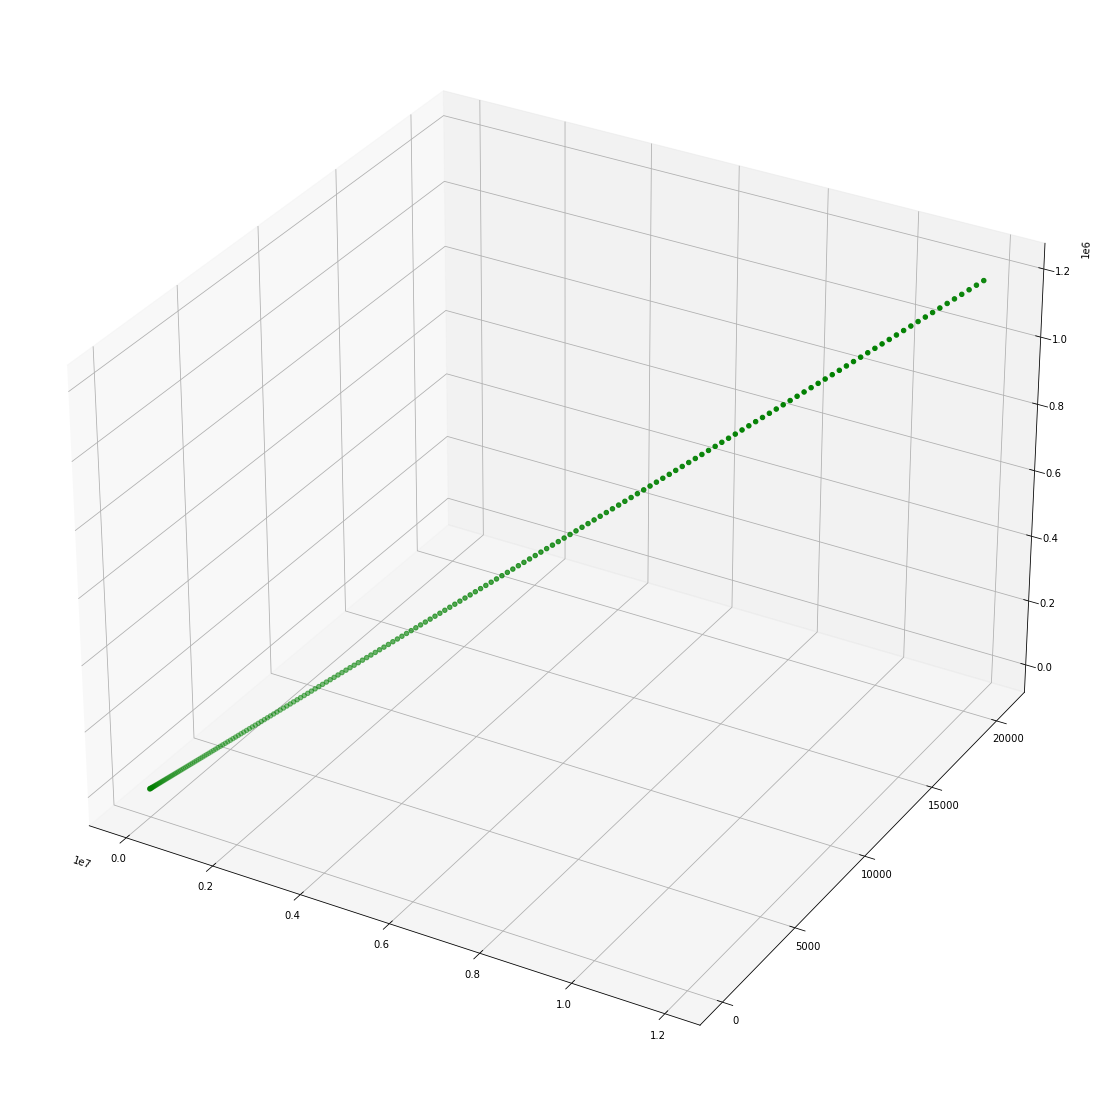

In [12]:
# Creamos la figura
fig = plt.figure(figsize=(20,20))

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')
ax1.scatter(y, x, z, c='g', marker='o')
# Mostramos el gráfico
plt.show()

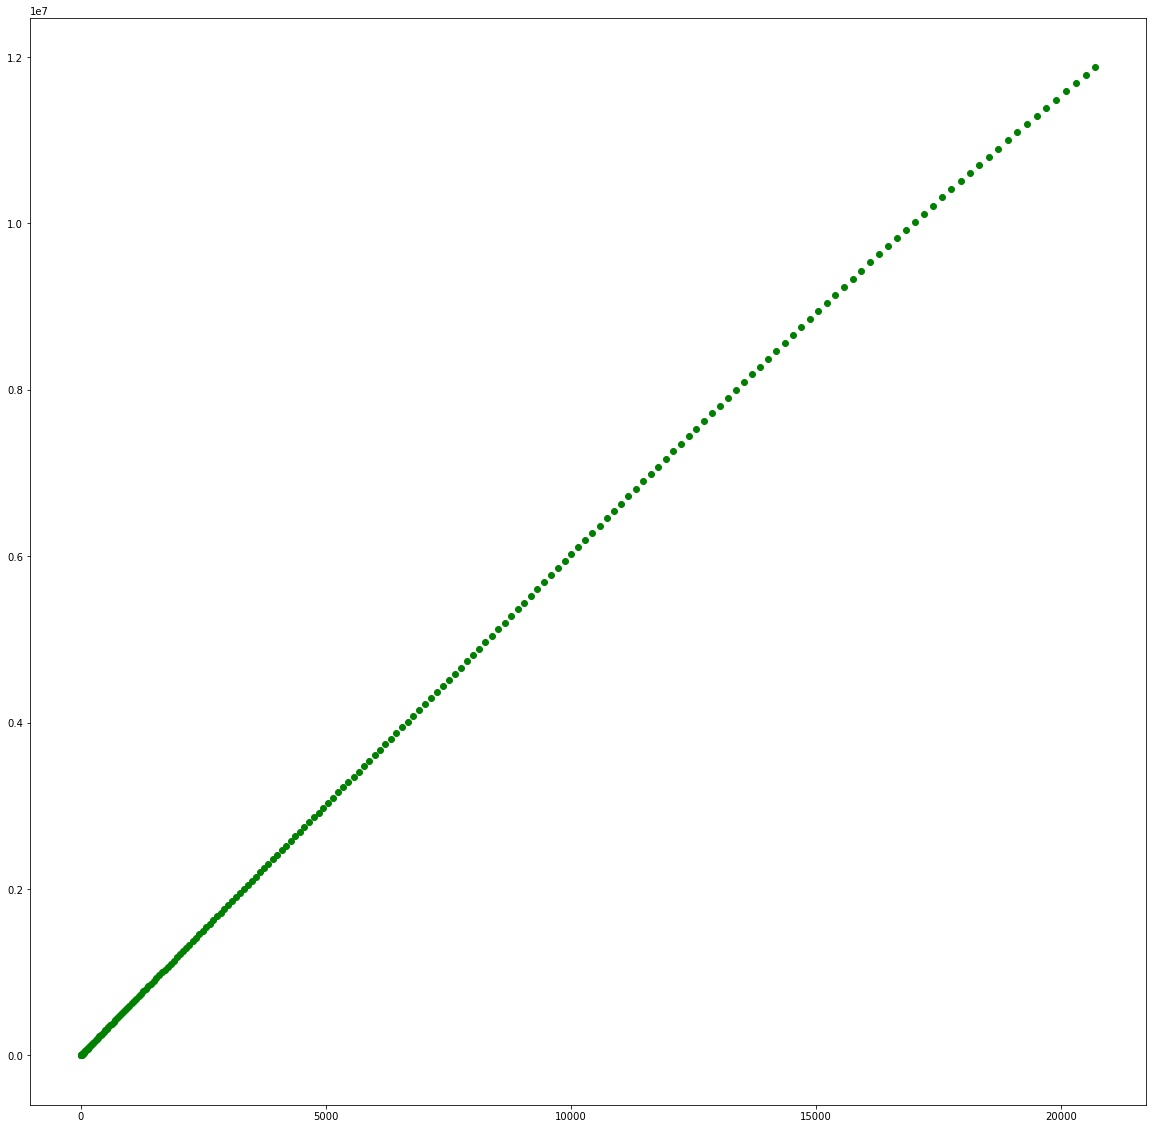

In [13]:
# Creamos la figura
fig = plt.figure(figsize=(20,20))

# Agrrgamos un plano 3D
ax1 = fig.add_subplot()
ax1.scatter( x, y, c='g', marker='o')
# Mostramos el gráfico
plt.show()

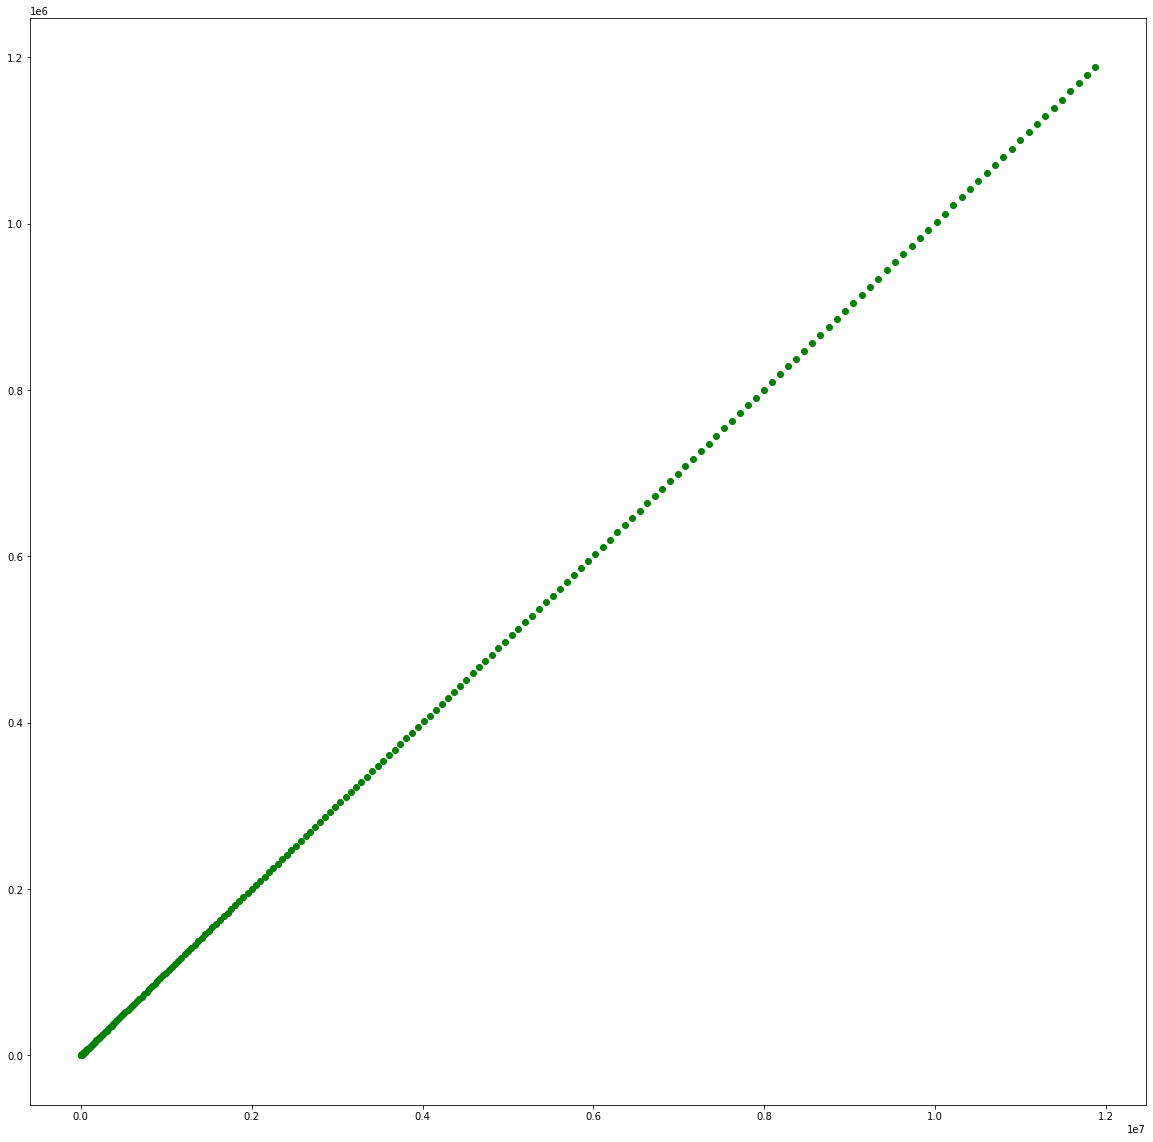

In [14]:
# Creamos la figura
fig = plt.figure(figsize=(20,20))

# Agrrgamos un plano 3D
ax1 = fig.add_subplot()
ax1.scatter(y, z, c='g', marker='o')
# Mostramos el gráfico
plt.show()

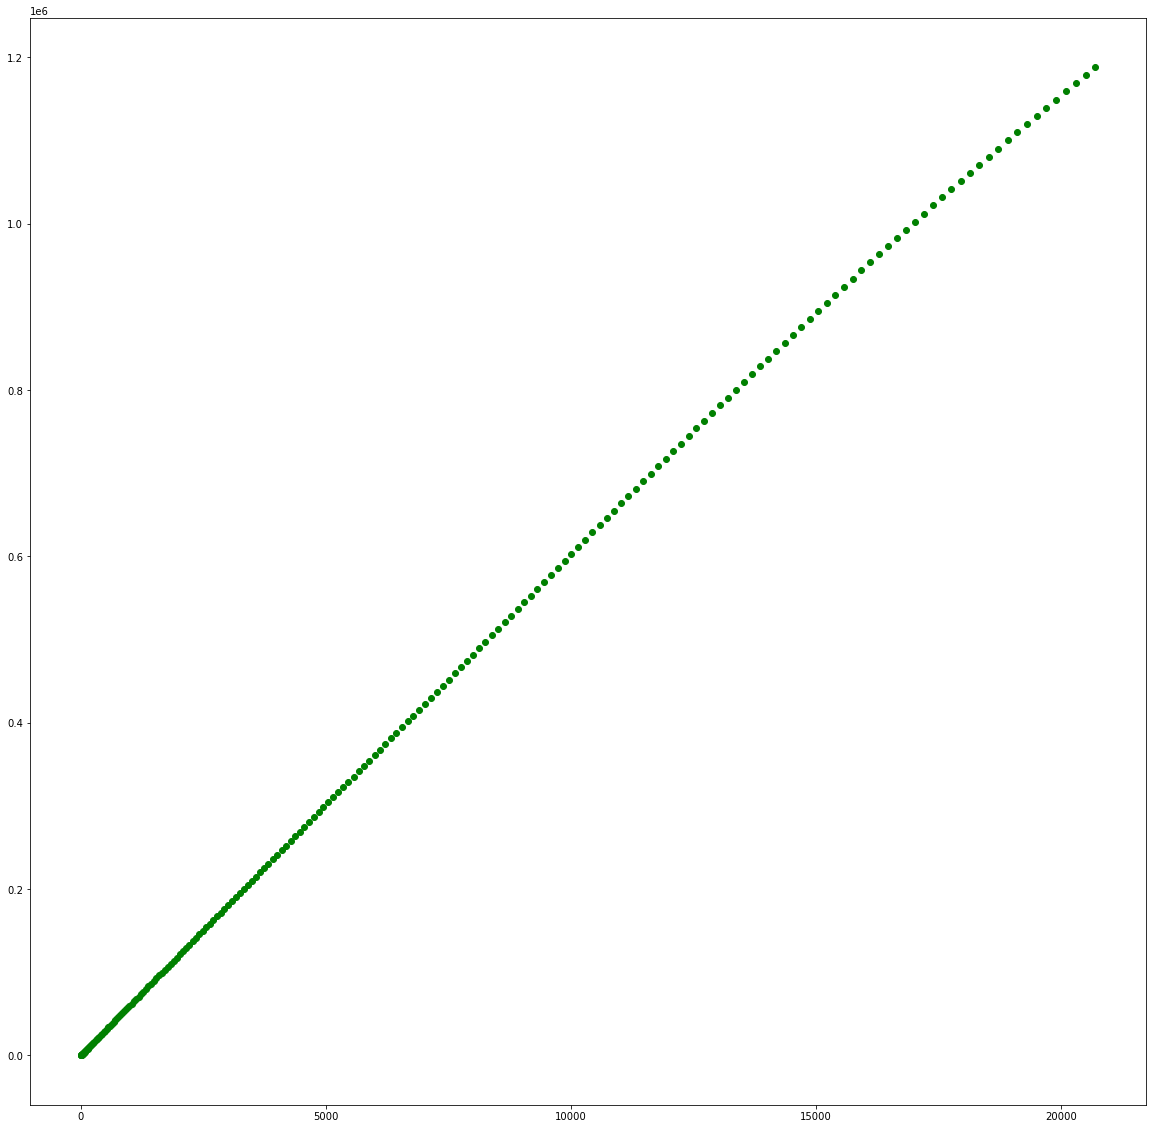

In [15]:
# Creamos la figura
fig = plt.figure(figsize=(20,20))

# Agrrgamos un plano 3D
ax1 = fig.add_subplot()
ax1.scatter( x, z, c='g', marker='o')
# Mostramos el gráfico
plt.show()

In [16]:
a=[1,2,3]

In [17]:
a[-1]

3